# Numpy Exercise 3

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import antipackage
import github.ellisonbg.misc.vizarray as va

Downloading:  https://raw.githubusercontent.com/ellisonbg/misc/master/vizarray.py
Using existing version:  github.ellisonbg.misc.vizarray


## Geometric Brownian motion

Here is a function that produces standard Brownian motion using NumPy. This is also known as a [Wiener Process](http://en.wikipedia.org/wiki/Wiener_process).

In [11]:
def brownian(maxt, n):
    """Return one realization of a Brownian (Wiener) process with n steps and a max time of t."""
    t = np.linspace(0.0,maxt,n)
    h = t[1]-t[0]
    Z = np.random.normal(0.0,1.0,n-1)
    dW = np.sqrt(h)*Z
    W = np.zeros(n)
    W[1:] = dW.cumsum()
    return t, W

Call the `brownian` function to simulate a Wiener process with `1000` steps and max time of `1.0`. Save the results as two arrays `t` and `W`.

In [15]:
c = np.array(brownian(1.0, 1000))
c
t = c[0,:]
W = c[1,:]
print t
print W

[ 0.          0.001001    0.002002    0.003003    0.004004    0.00500501
  0.00600601  0.00700701  0.00800801  0.00900901  0.01001001  0.01101101
  0.01201201  0.01301301  0.01401401  0.01501502  0.01601602  0.01701702
  0.01801802  0.01901902  0.02002002  0.02102102  0.02202202  0.02302302
  0.02402402  0.02502503  0.02602603  0.02702703  0.02802803  0.02902903
  0.03003003  0.03103103  0.03203203  0.03303303  0.03403403  0.03503504
  0.03603604  0.03703704  0.03803804  0.03903904  0.04004004  0.04104104
  0.04204204  0.04304304  0.04404404  0.04504505  0.04604605  0.04704705
  0.04804805  0.04904905  0.05005005  0.05105105  0.05205205  0.05305305
  0.05405405  0.05505506  0.05605606  0.05705706  0.05805806  0.05905906
  0.06006006  0.06106106  0.06206206  0.06306306  0.06406406  0.06506507
  0.06606607  0.06706707  0.06806807  0.06906907  0.07007007  0.07107107
  0.07207207  0.07307307  0.07407407  0.07507508  0.07607608  0.07707708
  0.07807808  0.07907908  0.08008008  0.08108108  0

In [16]:
assert isinstance(t, np.ndarray)
assert isinstance(W, np.ndarray)
assert t.dtype==np.dtype(float)
assert W.dtype==np.dtype(float)
assert len(t)==len(W)==1000

Visualize the process using `plt.plot` with `t` on the x-axis and `W(t)` on the y-axis. Label your x and y axes.

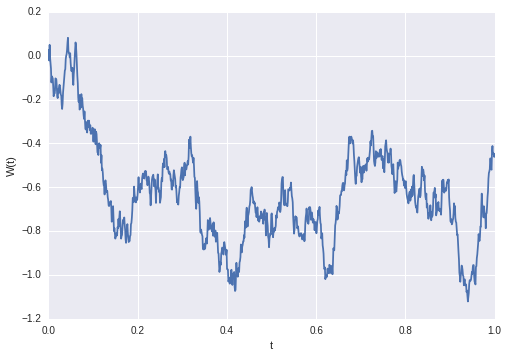

In [18]:
plt.plot(t, W)
plt.xlabel('t')
plt.ylabel('W(t)')

In [ ]:
assert True # this is for grading

Use `np.diff` to compute the changes at each step of the motion, `dW`, and then compute the mean and standard deviation of those differences.

In [29]:
dW = np.diff(W)
y = dW.mean()
z = dW.std()

In [30]:
assert len(dW)==len(W)-1
assert dW.dtype==np.dtype(float)

Write a function that takes $W(t)$ and converts it to geometric Brownian motion using the equation:

$$
X(t) = X_0 e^{((\mu - \sigma^2/2)t + \sigma W(t))}
$$

Use Numpy ufuncs and no loops in your function.

In [35]:
def geo_brownian(t, W, X0, mu, sigma):
    "Return X(t) for geometric brownian motion with drift mu, volatility sigma."""
    X_t = X0 * np.exp((mu - sigma**2) * t + sigma * W)
    return X_t

In [36]:
assert True # leave this for grading

Use your function to simulate geometric brownian motion, $X(t)$ for $X_0=1.0$, $\mu=0.5$ and $\sigma=0.3$ with the Wiener process you computed above.

Visualize the process using `plt.plot` with `t` on the x-axis and `X(t)` on the y-axis. Label your x and y axes.

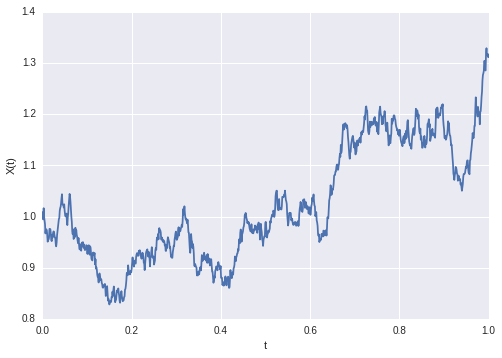

In [37]:
plt.plot(t, geo_brownian(t, W, 1.0, 0.5, 0.3))
plt.xlabel('t')
plt.ylabel('X(t)')

In [ ]:
assert True # leave this for grading